In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_redundant=0, n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [5]:
import pandas as pd 
df1=pd.DataFrame(X,columns=['F1','F2'])
df2=pd.DataFrame(y,columns=['Target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,F1,F2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
final_df['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

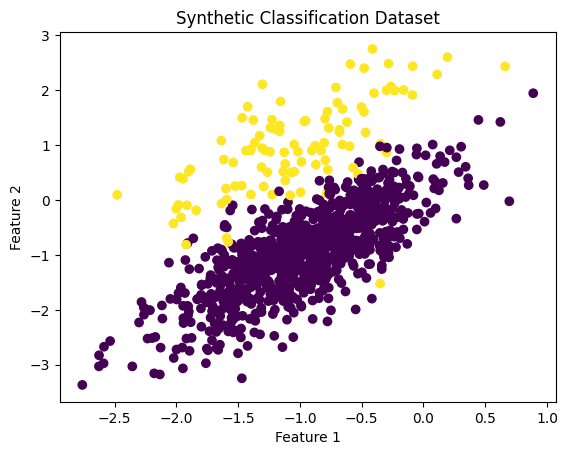

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df['F1'], final_df['F2'], c=final_df['Target'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()


In [8]:

# Import SMOTE after ensuring compatibility
from imblearn.over_sampling import SMOTE

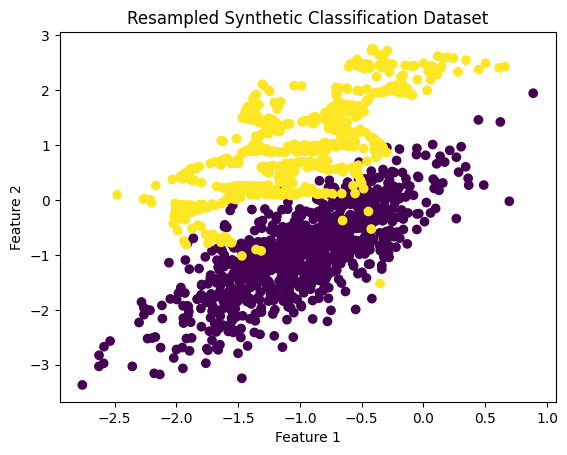

In [9]:
## Trasform the dataset using SMOTE
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['F1', 'F2']], final_df['Target'])
# Convert back to DataFrame
X_resampled = pd.DataFrame(X, columns=['F1', 'F2'])
y_resampled = pd.Series(y, name='Target')
# Combine resampled features and target into a single DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df['Target'].value_counts()
# Visualize the resampled dataset
plt.scatter(resampled_df['F1'], resampled_df['F2'], c=resampled_df['Target'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Resampled Synthetic Classification Dataset')
plt.show()


In [12]:
X.shape,y.shape

((1800, 2), (1800,))

In [14]:
len(y[y==0])

900